<a href="https://colab.research.google.com/github/andersonjhones/Regression/blob/main/Previsao_IndicadorRendimento_merge_inep_censo_ideb_ensino_fundamental_inicial_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neste notebook visamos prever O indicador de rendimento. Foi feita uma mesclagem de dados do censo inep e do ideb. Ressalta-se que exploramos várias bases de dados, tratamos, analisamos, fizemos seleção de atributos, mas as variáveis independentes não estavam explicando a variável alvo quando aplicamos modelos. Após várias explorações de bases de dados chegados nesta, que é a união de dados do  inep e do ideb, com a inteção de criar um modelo de regressão para previsão do indicador de redimento escolar. Neste notebook encontra-se a aplicação de alguns algoritmos de regressão com os dados sem e com normalização e padronização (a normalização foi a de mínimo e máximo variando de zero a um e a padronização foi a z score). Os modelos foram testados com 107 colunas de atributos e depois reduziu-se para 19 fazendo seleção de características mais importantes. Pretende-se melhor os resultados para a entrega final e ainda a possibilidade de inclusão de novas features, a fim de verificar se serão benéficas aos modelos. Pretende-se também criar um target trabalhando com classificação na intenção de explorar mais possibilidades e conseguir mais resultados. Posteriormente serão enviados os outros notebooks de exploração dos dados.** 

**Algumas das bibliotecas utilizadas**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

import pathlib

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import pandas as pd

In [ ]:
df = pd.read_csv('https://github.com/victordsrocha/mineracao_2022/blob/main/merge_inep_censo_ideb-ensino-fundamental-inicial.csv?raw=true')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

#Mostra os valores exclusivos de cada coluna

# for i in dados_escola_inep.columns:
#     print(f"*****{i}*****")
#     display(dados_escola_inep[i].value_counts())
#     print("---------------------------")
# print()

#lalalala

# segundo lalala

,ano,sigla_uf_x,id_municipio_x,rede_x,id_escola,id_orgao_regional,tipo_situacao_funcionamento,data_ano_letivo_termino,tipo_localizacao,tipo_regulamentacao,local_func_predio_escolar,local_func_salas_empresa,local_func_predio_compartilhado,local_func_unid_prisional,local_func_templo_igreja,local_func_casa_professor,local_func_outros,local_func_salas_outra_esc,agua_potavel,agua_rede_publica,agua_poco_artesiano,agua_cacimba,agua_fonte_rio,agua_inexistente,energia_rede_publica,energia_gerador,energia_outros,energia_inexistente,esgoto_rede_publica,esgoto_fossa,esgoto_inexistente,lixo_servico_coleta,lixo_queima,lixo_descarta_outra_area,tratamento_lixo_reciclagem,lixo_enterra,lixo_outros,sala_diretoria,sala_professor,laboratorio_informatica,laboratorio_ciencias,sala_atendimento_especial,quadra_esportes_coberta,quadra_esportes_descoberta,cozinha,biblioteca,sala_leitura,parque_infantil,bercario,banheiro_fora_predio,banheiro_dentro_predio,banheiro_ei,banheiro_pne,dependencias_pne,dependencias_outras,quantidade_salas_utilizadas,equipamento_tv,equipamento_dvd,equipamento_parabolica,equipamento_copiadora,equipamento_impressora,internet,banda_larga,alimentacao,tipo_atendimento_educacional_especial,tipo_atividade_complementar,regular,comum_creche,comum_pre,comum_fund_ai,comum_fund_af,comum_medio_medio,comum_medio_integrado,comum_medio_normal,comum_prof,especial_exclusiva,especial_exclusiva_creche,especial_exclusiva_pre,especial_exclusiva_fund_ai,especial_exclusiva_fund_af,especial_exclusiva_medio_medio,especial_exclusiva_medio_integr,especial_exclusiva_medio_normal,especial_exclusiva_prof,especial_exclusiva_eja_fund,especial_exclusiva_eja_medio,eja,comum_eja_fund,comum_eja_medio,fundamental_ciclos,tipo_localizacao_diferenciada,material_esp_nao_utiliza,material_esp_quilombola,material_ped_indigena,educacao_indigena,localizacao,atu_ef,atu_ef_anos_iniciais,atu_ef_1_ano,atu_ef_2_ano,atu_ef_3_ano,atu_ef_4_ano,atu_ef_5_ano,had_ef,had_ef_anos_iniciais,had_ef_4_ano,had_ef_5_ano,tdi_ef,tdi_ef_anos_iniciais,tdi_ef_2_ano,tdi_ef_3_ano,tdi_ef_4_ano,tdi_ef_5_ano,taxa_aprovacao_ef,taxa_aprovacao_ef_anos_iniciais,taxa_aprovacao_ef_1_ano,taxa_aprovacao_ef_2_ano,taxa_aprovacao_ef_3_ano,taxa_aprovacao_ef_4_ano,taxa_aprovacao_ef_5_ano,taxa_reprovacao_ef,taxa_reprovacao_ef_anos_iniciais,taxa_reprovacao_ef_1_ano,taxa_reprovacao_ef_2_ano,taxa_reprovacao_ef_3_ano,taxa_reprovacao_ef_4_ano,taxa_reprovacao_ef_5_ano,taxa_abandono_ef,taxa_abandono_ef_anos_iniciais,taxa_abandono_ef_1_ano,taxa_abandono_ef_2_ano,taxa_abandono_ef_3_ano,taxa_abandono_ef_4_ano,taxa_abandono_ef_5_ano,dsu_ef,dsu_ef_anos_iniciais,icg_nivel_complexidade_gestao_escola,id_municipio,rede,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb
0,2011,AL,2702405,municipal,27214907,00011,1,2011-12-16,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,urbana,31.3,29.7,26.3,20.7,34.3,30.0,41.0,4.6,4.3,4.3,4.3,45.8,25.2,14.3,34.1,30.6,32.7,64.1,74.3,84.1,69.1,66.9,86.8,70.0,23.0,21.9,14.6,25.0,28.1,10.3,26.0,12.9,3.8,1.3,5.9,5.0,2.9,4.0,56.1,53.8,,2702405,municipal,74.3,0.744973,184.64,173.35,4.639726,3.5
1,2011,AL,2702900,municipal,27018814,00005,1,2012-01-06,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,urbana,36.5,37.3,40.0,43.0,32.0,35.0,40.5,4.3,4.3,4.3,4.3,47.3,31.5,20.9,26.6,35.7,50.6,61.6,75.3,94.6,92.9,45.3,95.7,63.3,23.4,18.8,0.0,0.0,45.3,0.0,32.9,15.

**Fazendo delete de colunas desnecessárias, que são constantes ou apenas um ID**

In [ ]:
colunas_deletar = [
                   'ano', 'sigla_uf_x', 'id_escola', 'rede_x', 'id_municipio_x', 'id_orgao_regional',
                   'tipo_situacao_funcionamento', 'data_ano_letivo_termino', 'tipo_regulamentacao',
                   'id_municipio', 'rede', 'localizacao'        
]

df = df.drop(colunas_deletar, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [ ]:
df.head()

,tipo_localizacao,local_func_predio_escolar,local_func_salas_empresa,local_func_predio_compartilhado,local_func_unid_prisional,local_func_templo_igreja,local_func_casa_professor,local_func_outros,local_func_salas_outra_esc,agua_potavel,agua_rede_publica,agua_poco_artesiano,agua_cacimba,agua_fonte_rio,agua_inexistente,energia_rede_publica,energia_gerador,energia_outros,energia_inexistente,esgoto_rede_publica,esgoto_fossa,esgoto_inexistente,lixo_servico_coleta,lixo_queima,lixo_descarta_outra_area,tratamento_lixo_reciclagem,lixo_enterra,lixo_outros,sala_diretoria,sala_professor,laboratorio_informatica,laboratorio_ciencias,sala_atendimento_especial,quadra_esportes_coberta,quadra_esportes_descoberta,cozinha,biblioteca,sala_leitura,parque_infantil,bercario,banheiro_fora_predio,banheiro_dentro_predio,banheiro_ei,banheiro_pne,dependencias_pne,dependencias_outras,quantidade_salas_utilizadas,equipamento_tv,equipamento_dvd,equipamento_parabolica,equipamento_copiadora,equipamento_impressora,internet,banda_larga,alimentacao,tipo_atendimento_educacional_especial,tipo_atividade_complementar,regular,comum_creche,comum_pre,comum_fund_ai,comum_fund_af,comum_medio_medio,comum_medio_integrado,comum_medio_normal,comum_prof,especial_exclusiva,especial_exclusiva_creche,especial_exclusiva_pre,especial_exclusiva_fund_ai,especial_exclusiva_fund_af,especial_exclusiva_medio_medio,especial_exclusiva_medio_integr,especial_exclusiva_medio_normal,especial_exclusiva_prof,especial_exclusiva_eja_fund,especial_exclusiva_eja_medio,eja,comum_eja_fund,comum_eja_medio,fundamental_ciclos,tipo_localizacao_diferenciada,material_esp_nao_utiliza,material_esp_quilombola,material_ped_indigena,educacao_indigena,atu_ef,atu_ef_anos_iniciais,atu_ef_1_ano,atu_ef_2_ano,atu_ef_3_ano,atu_ef_4_ano,atu_ef_5_ano,had_ef,had_ef_anos_iniciais,had_ef_4_ano,had_ef_5_ano,tdi_ef,tdi_ef_anos_iniciais,tdi_ef_2_ano,tdi_ef_3_ano,tdi_ef_4_ano,tdi_ef_5_ano,taxa_aprovacao_ef,taxa_aprovacao_ef_anos_iniciais,taxa_aprovacao_ef_1_ano,taxa_aprovacao_ef_2_ano,taxa_aprovacao_ef_3_ano,taxa_aprovacao_ef_4_ano,taxa_aprovacao_ef_5_ano,taxa_reprovacao_ef,taxa_reprovacao_ef_anos_iniciais,taxa_reprovacao_ef_1_ano,taxa_reprovacao_ef_2_ano,taxa_reprovacao_ef_3_ano,taxa_reprovacao_ef_4_ano,taxa_reprovacao_ef_5_ano,taxa_abandono_ef,taxa_abandono_ef_anos_iniciais,taxa_abandono_ef_1_ano,taxa_abandono_ef_2_ano,taxa_abandono_ef_3_ano,taxa_abandono_ef_4_ano,taxa_abandono_ef_5_ano,dsu_ef,dsu_ef_anos_iniciais,icg_nivel_complexidade_gestao_escola,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,31.3,29.7,26.3,20.7,34.3,30.0,41.0,4.6,4.3,4.3,4.3,45.8,25.2,14.3,34.1,30.6,32.7,64.1,74.3,84.1,69.1,66.9,86.8,70.0,23.0,21.9,14.6,25.0,28.1,10.3,26.0,12.9,3.8,1.3,5.9,5.0,2.9,4.0,56.1,53.8,,74.3,0.744973,184.64,173.35,4.639726,3.5
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,36.5,37.3,40.0,43.0,32.0,35.0,40.5,4.3,4.3,4.3,4.3,47.3,31.5,20.9,26.6,35.7,50.6,61.6,75.3,94.6,92.9,45.3,95.7,63.3,23.4,18.8,0.0,0.0,45.3,0.0,32.9,15.0,5.9,5.4,7.1,9.4,4.3,3.8,56.8,50.0,,75.3,0.717800,175.75,160.66,4.239333,3.0
2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,

**Observando a correlação com o target indicador de rendimento** 

As colunas de taxa de reprovação são muito correlacionadas, pois participam do cálculo do indicador de rendimento, entao serão excluídas.

In [ ]:
df.corr()['indicador_rendimento'].apply(abs).sort_values(ascending=False)

indicador_rendimento                     1.000000
taxa_aprovacao_ef_anos_iniciais          0.986066
taxa_aprovacao                           0.986066
taxa_reprovacao_ef_anos_iniciais         0.942926
taxa_aprovacao_ef                        0.855430
taxa_reprovacao_ef                       0.813104
taxa_aprovacao_ef_3_ano                  0.760011
taxa_aprovacao_ef_5_ano                  0.741912
taxa_aprovacao_ef_4_ano                  0.737489
ideb                                     0.728584
tdi_ef_anos_iniciais                     0.727581
taxa_reprovacao_ef_3_ano                 0.704316
tdi_ef                                   0.679973
taxa_reprovacao_ef_4_ano                 0.675787
taxa_reprovacao_ef_5_ano                 0.673299
tdi_ef_4_ano                             0.657791
tdi_ef_3_ano                             0.657593
taxa_aprovacao_ef_2_ano                  0.652196
tdi_ef_5_ano                             0.648400
taxa_abandono_ef_anos_iniciais           0.588283


O dataset não apresenta nenhum dado nulo pois já foi tratado

In [ ]:
df.isna().sum().sum()

0

**Definindo as variáveis independentes utilizadas e o target (dropando todas essas colunas a baixo.**

In [ ]:
X = df.drop([ 'ideb',
             'taxa_aprovacao_ef_anos_iniciais',
             'taxa_aprovacao',
             'taxa_reprovacao_ef_anos_iniciais',
             'taxa_reprovacao_ef_anos_iniciais',
             'taxa_aprovacao_ef',
             'taxa_reprovacao_ef',
             'taxa_aprovacao_ef_3_ano',
             'taxa_aprovacao_ef_5_ano',
             'taxa_aprovacao_ef_4_ano',
             'taxa_reprovacao_ef_3_ano',
             'taxa_reprovacao_ef_4_ano',
             'taxa_reprovacao_ef_5_ano',
             'taxa_aprovacao_ef_2_ano',
             'taxa_abandono_ef_anos_iniciais',
             'taxa_reprovacao_ef_2_ano',
             'taxa_aprovacao_ef_1_ano',
             'taxa_abandono_ef',
             'taxa_abandono_ef_5_ano',
             'taxa_abandono_ef_4_ano',
             'taxa_abandono_ef_3_ano',
             'taxa_abandono_ef_2_ano',
             'taxa_abandono_ef_1_ano',             
             'taxa_reprovacao_ef_1_ano',
             'tipo_localizacao',
             'indicador_rendimento',
             'icg_nivel_complexidade_gestao_escola'
             ], 1)

y = df['indicador_rendimento']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
X.head()

,local_func_predio_escolar,local_func_salas_empresa,local_func_predio_compartilhado,local_func_unid_prisional,local_func_templo_igreja,local_func_casa_professor,local_func_outros,local_func_salas_outra_esc,agua_potavel,agua_rede_publica,...,tdi_ef_2_ano,tdi_ef_3_ano,tdi_ef_4_ano,tdi_ef_5_ano,dsu_ef,dsu_ef_anos_iniciais,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,14.3,34.1,30.6,32.7,56.1,53.8,184.64,173.35,4.639726,3.5
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,20.9,26.6,35.7,50.6,56.8,50.0,175.75,160.66,4.239333,3.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,9.1,2.4,27.9,30.9,25.0,0.0,164.88,145.58,3.757709,3.5
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,7.8,19.4,8.9,18.0,70.6,50.0,172.80,154.32,4.067581,3.6
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,12.5,20.8,17.1,8.8,100.0,100.0,199.61,185.22,5.141413,4.7


In [ ]:
y.head()

0    0.744973
1    0.717800
2    0.927093
3    0.881893
4    0.919351
Name: indicador_rendimento, dtype: float64

**Aplicando um modelo de rede neural**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape

(13026, 107)

**Modelo com função de ativação relu camadas internas com 12 e 5 neurônios e a camada de saída com um neurônio, taxa de aprendizagem de 0,001, otimizador Adam, buscando reduzir o mse.**

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(12, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(5, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
# import numpy as np
# X = np.asarray(X).astype('float32')
# y = np.asarray(y).astype('float32')

**Treinamento da rede neural com 100 épocas**

In [ ]:
EPOCHS = 100

history = model.fit(
  X_train.values, y_train.values,
  epochs=EPOCHS, validation_split = 0.2)

Epoch 1/100
326/326 [==============================] - 1s 3ms/step - loss: 1.3094 - mae: 0.6729 - mse: 1.3094 - val_loss: 0.0664 - val_mae: 0.1889 - val_mse: 0.0664
Epoch 2/100
326/326 [==============================] - 1s 2ms/step - loss: 0.0373 - mae: 0.1403 - mse: 0.0373 - val_loss: 0.0235 - val_mae: 0.1153 - val_mse: 0.0235
Epoch 3/100
326/326 [==============================] - 1s 2ms/step - loss: 0.0192 - mae: 0.1030 - mse: 0.0192 - val_loss: 0.0152 - val_mae: 0.0952 - val_mse: 0.0152
Epoch 4/100
326/326 [==============================] - 1s 2ms/step - loss: 0.0138 - mae: 0.0888 - mse: 0.0138 - val_loss: 0.0117 - val_mae: 0.0850 - val_mse: 0.0117
Epoch 5/100
326/326 [==============================] - 1s 2ms/step - loss: 0.0112 - mae: 0.0813 - mse: 0.0112 - val_loss: 0.0104 - val_mae: 0.0797 - val_mse: 0.0104
Epoch 6/100
326/326 [==============================] - 1s 2ms/step - loss: 0.0097 - mae: 0.0762 - mse: 0.0097 - val_loss: 0.0092 - val_mae: 0.0751 - val_mse: 0.0092
Epoch 7/10

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18609 entries, 0 to 18608
Columns: 110 entries, tipo_localizacao to ideb
dtypes: float64(108), int64(1), object(1)
memory usage: 15.6+ MB


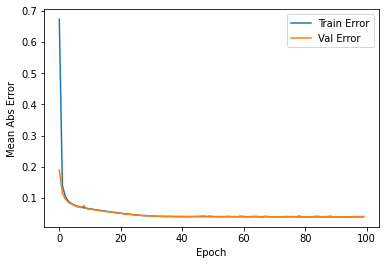

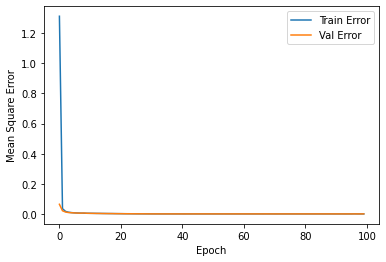

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.legend()
  plt.show()


plot_history(history)

In [ ]:
ypred=model.predict(X_test)

In [ ]:
ypred[0]

array([0.9212415], dtype=float32)

**Valor do R quadrado. O R-quadrado é uma medida estatística de quão próximos os dados estão da linha de regressão ajustada. Ele também é conhecido como o coeficiente de determinação ou o coeficiente de determinação múltipla para a regressão múltipla.** R2  de 0,547.

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.5475220255963076

In [ ]:
X.shape

(18609, 107)

**Regressão linear obteve um valor de 0,57 de R2 nos dados de teste**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.score(X_train, y_train)

0.5568458495617786

In [ ]:
regressor.score(X_test, y_test)

0.5709481940526968

**XGBRegressor teve um R2 de 0,58 nos dados de teste**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [ ]:
modelxgb = XGBRegressor(objective='reg:squarederror')

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
n_scores = cross_val_score(modelxgb, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
from numpy import mean
from numpy import std

In [ ]:
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.039 (0.001)


In [ ]:
modelxgb = XGBRegressor(objective='reg:squarederror')
modelxgb.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror')

In [ ]:
yt = modelxgb.predict(X_test)
print('Prediction: %.3f' % yt[0])

Prediction: 0.916


**R2 para o XGBRegressor nos dados de teste**

In [ ]:
r2_score(y_test, yt)

0.5884426234893394

In [ ]:
yhat = modelxgb.predict(X_train)
print('Prediction: %.3f' % yhat[0])

Prediction: 0.935


**R2 para o XGBRegressor nos dados de treino**

In [ ]:
r2_score(y_train, yhat)

0.6046671711098983

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_pred = cross_val_predict(modelxgb, X_test, y_test, cv=cv)

In [ ]:
r2_score(y_test, y_pred)

0.5757676623761114

**Previsão com catboost**

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
from numpy import mean
from numpy import std
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
modelcb = CatBoostRegressor(verbose=1, n_estimators=500)
cvcb = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)
n_scorescb = cross_val_score(modelcb, X_train, y_train, scoring='neg_mean_absolute_error', cv=cvcb, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scorescb), std(n_scorescb)))
modelcb = CatBoostRegressor(verbose=0, n_estimators=500)
modelcb.fit(X_train, y_train)
yhatcb = modelcb.predict(X_train)
print('Prediction: %.3f' % yhatcb[0])

MAE: -0.038 (0.001)
Prediction: 0.936


In [ ]:
ythcb = modelcb.predict(X_test)
print('Prediction: %.3f' % ythcb[0])

Prediction: 0.917


In [ ]:
ythcbtr = modelcb.predict(X_train)
print('Prediction: %.3f' % ythcbtr[0])

Prediction: 0.936


In [ ]:
r2_score(y_train, ythcbtr)

0.762834476008857

**Previsão de R2 0,59 com catboost**

In [ ]:
r2_score(y_test, ythcb)

0.5913284935124022

In [ ]:
modelcb.feature_importances_

array([2.94069735e-01, 2.90984550e-02, 2.06128669e-01, 2.49576345e-02,
       3.85043803e-03, 1.10808921e-03, 1.68634885e-01, 2.47141731e-01,
       3.59546953e-01, 5.19912124e-01, 1.64153179e-01, 1.72899892e-01,
       6.68890128e-02, 2.06372880e-02, 3.84648800e-03, 1.48513235e-05,
       1.41153017e-03, 0.00000000e+00, 6.94023528e-01, 3.56119631e-01,
       1.10540888e-02, 2.43896040e-01, 1.67547959e-01, 8.71150410e-02,
       1.16085790e-01, 2.12628950e-02, 1.06171318e-02, 2.31722529e-01,
       2.67272132e-01, 7.95222853e-01, 1.88461308e-01, 2.86006514e-01,
       6.62346356e-02, 2.53188732e-01, 3.75147992e-02, 7.30598727e-01,
       6.83164343e-01, 1.21881446e-01, 0.00000000e+00, 6.65428040e-02,
       2.93060993e-02, 1.42065144e-01, 2.45622667e-01, 3.07137961e-01,
       0.00000000e+00, 1.68306820e+00, 3.72529957e-02, 1.87858390e-01,
       3.09552086e-01, 5.57544359e-01, 8.52634196e-02, 0.00000000e+00,
       2.30926523e-01, 0.00000000e+00, 1.37523518e-01, 5.42944588e-01,
      

**Seleção de atributos com a biblioteca shap**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install shap
import shap

In [ ]:
explainer = shap.TreeExplainer(modelcb)
shap_values = explainer.shap_values(X_test)



In [ ]:
X.head()

,local_func_predio_escolar,local_func_salas_empresa,local_func_predio_compartilhado,local_func_unid_prisional,local_func_templo_igreja,local_func_casa_professor,local_func_outros,local_func_salas_outra_esc,agua_potavel,agua_rede_publica,agua_poco_artesiano,agua_cacimba,agua_fonte_rio,agua_inexistente,energia_rede_publica,energia_gerador,energia_outros,energia_inexistente,esgoto_rede_publica,esgoto_fossa,esgoto_inexistente,lixo_servico_coleta,lixo_queima,lixo_descarta_outra_area,tratamento_lixo_reciclagem,lixo_enterra,lixo_outros,sala_diretoria,sala_professor,laboratorio_informatica,laboratorio_ciencias,sala_atendimento_especial,quadra_esportes_coberta,quadra_esportes_descoberta,cozinha,biblioteca,sala_leitura,parque_infantil,bercario,banheiro_fora_predio,banheiro_dentro_predio,banheiro_ei,banheiro_pne,dependencias_pne,dependencias_outras,quantidade_salas_utilizadas,equipamento_tv,equipamento_dvd,equipamento_parabolica,equipamento_copiadora,equipamento_impressora,internet,banda_larga,alimentacao,tipo_atendimento_educacional_especial,tipo_atividade_complementar,regular,comum_creche,comum_pre,comum_fund_ai,comum_fund_af,comum_medio_medio,comum_medio_integrado,comum_medio_normal,comum_prof,especial_exclusiva,especial_exclusiva_creche,especial_exclusiva_pre,especial_exclusiva_fund_ai,especial_exclusiva_fund_af,especial_exclusiva_medio_medio,especial_exclusiva_medio_integr,especial_exclusiva_medio_normal,especial_exclusiva_prof,especial_exclusiva_eja_fund,especial_exclusiva_eja_medio,eja,comum_eja_fund,comum_eja_medio,fundamental_ciclos,tipo_localizacao_diferenciada,material_esp_nao_utiliza,material_esp_quilombola,material_ped_indigena,educacao_indigena,atu_ef,atu_ef_anos_iniciais,atu_ef_1_ano,atu_ef_2_ano,atu_ef_3_ano,atu_ef_4_ano,atu_ef_5_ano,had_ef,had_ef_anos_iniciais,had_ef_4_ano,had_ef_5_ano,tdi_ef,tdi_ef_anos_iniciais,tdi_ef_2_ano,tdi_ef_3_ano,tdi_ef_4_ano,tdi_ef_5_ano,dsu_ef,dsu_ef_anos_iniciais,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,31.3,29.7,26.3,20.7,34.3,30.0,41.0,4.6,4.3,4.3,4.3,45.8,25.2,14.3,34.1,30.6,32.7,56.1,53.8,184.64,173.35,4.639726
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,36.5,37.3,40.0,43.0,32.0,35.0,40.5,4.3,4.3,4.3,4.3,47.3,31.5,20.9,26.6,35.7,50.6,56.8,50.0,175.75,160.66,4.239333
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,26.1,20.7,18.5,16.5,21.0,22.7,22.0,4.0,4.0,4.0,4.0,31.1,20.0,9.1,2.4,27.9,30.9,25.0,0.0,164.88,145.58,3.757709
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,32.5,31.9,21.0,25.5,33.5,45.0,50.0,4.4,4.5,4.5,4.5,15.8,12.2,7.8,19.4,8.9,18.0,70.6,50.0,172.80,154.32,4.067581
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0

In [ ]:
X.columns

Index(['local_func_predio_escolar', 'local_func_salas_empresa',
       'local_func_predio_compartilhado', 'local_func_unid_prisional',
       'local_func_templo_igreja', 'local_func_casa_professor',
       'local_func_outros', 'local_func_salas_outra_esc', 'agua_potavel',
       'agua_rede_publica',
       ...
       'tdi_ef_anos_iniciais', 'tdi_ef_2_ano', 'tdi_ef_3_ano', 'tdi_ef_4_ano',
       'tdi_ef_5_ano', 'dsu_ef', 'dsu_ef_anos_iniciais',
       'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa',
       'nota_saeb_media_padronizada'],
      dtype='object', length=107)

**Atributos mais importantes**

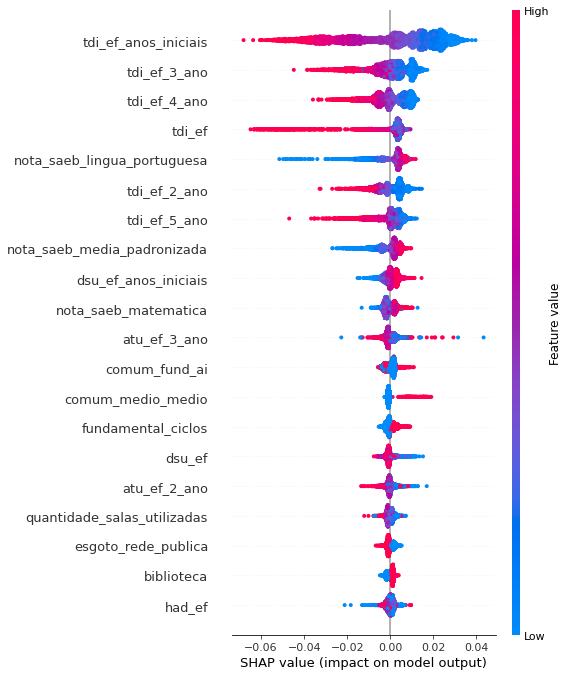

In [ ]:
shap.summary_plot(shap_values, X_test)

**Previsão com lightgbm**

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
modellgb = lgb.LGBMRegressor()
modellgb.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
predicttreino = modellgb.predict(X_train)

In [ ]:
predict = modellgb.predict(X_test)

**Previsão nos dados de treino**

In [ ]:
modellgb.score(X_train, y_train)

0.730640847723915

**Previsão nos dados de teste**

In [ ]:
modellgb.score(X_test, y_test)

0.5904635786647416

**Dispersão dos dados**

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


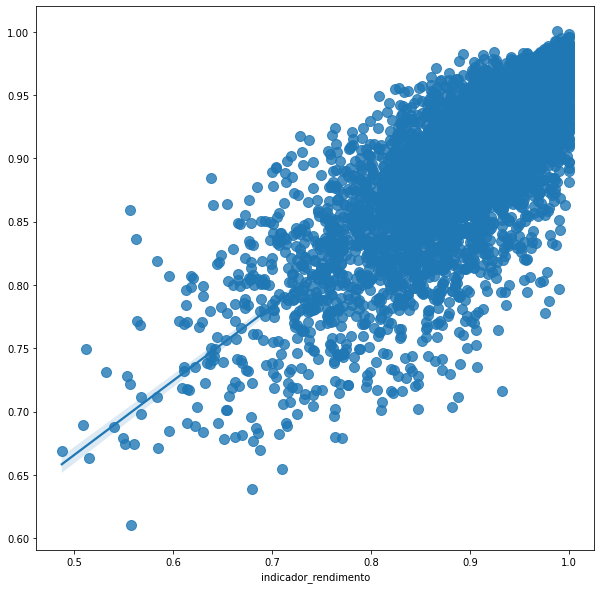

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(y_test, predict, fit_reg=True, scatter_kws={"s": 100})

**Previsão com RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_random_forest = RandomForestRegressor(n_estimators = 150)
regressor_random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

**Previsão com RandomForestRegressor dados de treino**

In [ ]:
regressor_random_forest.score(X_train, y_train)

0.9383817996539449

**Previsão com RandomForestRegressor dados de teste**

In [ ]:
regressor_random_forest.score(X_test, y_test)

0.5817667663865463

**Previsão com SVM**

In [ ]:
# Kernel rbf
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf', C=4.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='scale')
regressor_svr.fit(X_train, y_train)

SVR(C=4.0, epsilon=0.01)

In [ ]:
regressor_svr.predict(X_test)

array([0.91825741, 0.86523609, 0.96067591, ..., 0.95467808, 0.91524249,
       0.96223007])

**Previsão nos dados de treino**

In [ ]:
regressor_svr.score(X_train, y_train)

0.5691099848451135

**Previsão nos dados de teste (cálculo do R2)**

In [ ]:
regressor_svr.score(X_test, y_test)

0.5840433496829525

**Previsão com enable_hist_gradient_boosting**

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
modelhgb = HistGradientBoostingRegressor()
cvhgb = RepeatedKFold(n_splits=10, n_repeats=4, random_state=0)
n_scoreshgb = cross_val_score(modelhgb, X_train, y_train, scoring='neg_mean_absolute_error', cv=cvhgb, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scoreshgb), std(n_scoreshgb)))
# fit the model on the whole dataset
modelhgb = HistGradientBoostingRegressor()
modelhgb.fit(X_train, y_train)
yhathgb = modelhgb.predict(X_train)
print('Prediction: %.3f' % yhathgb[0])

MAE: -0.038 (0.001)
Prediction: 0.929


**R2 nos dados de treino**

In [ ]:
r2_score(y_train, yhathgb)

0.6878547486491584

In [ ]:
yhgb = modelhgb.predict(X_test)
print('Prediction: %.3f' % yhgb[0])

Prediction: 0.911


**R2 nos dados de teste**

In [ ]:
r2_score(y_test, yhgb)

0.5874933196558584

**Novo conjunto de atributos selecionados (19 atributos) Foram testas as configurações sem e com normalização e padronização, mas os resultados foram semelhantes**

In [ ]:
Xnew=X[['tdi_ef', 'tdi_ef_anos_iniciais', 'tdi_ef_2_ano', 'tdi_ef_3_ano', 'tdi_ef_4_ano',
       'tdi_ef_5_ano', 'dsu_ef', 'dsu_ef_anos_iniciais',
       'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'atu_ef_2_ano',	'atu_ef_3_ano', 'comum_fund_ai', 'comum_medio_medio', 'quantidade_salas_utilizadas', 'fundamental_ciclos', 'esgoto_rede_publica', 'biblioteca', 'had_ef']]

In [ ]:
Xnew.shape

(18609, 19)

**Train_test_split com normalização 0 a 1**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
escalonamento = MinMaxScaler(feature_range= (0,1))
Xreescalado = escalonamento.fit_transform(Xnew)

In [ ]:
from sklearn.model_selection import train_test_split
X_trainnew, X_testnew, y_trainnew, y_testnew = train_test_split(Xreescalado, y, test_size=0.3, random_state=0)
X_trainnew.shape

(13026, 19)

**Train_test_split com padronização z score**

In [ ]:
from sklearn.preprocessing import StandardScaler
stdr = StandardScaler().fit(Xnew)
Xreescaladostdr = stdr.transform(Xnew)

In [ ]:
from sklearn.model_selection import train_test_split
X_trainnew, X_testnew, y_trainnew, y_testnew = train_test_split(Xreescaladostdr, y, test_size=0.3, random_state=0)
X_trainnew.shape

(13026, 19)

**Train_test_split sem normalização ou padronização**

In [ ]:
from sklearn.model_selection import train_test_split
X_trainnew, X_testnew, y_trainnew, y_testnew = train_test_split(Xnew, y, test_size=0.3, random_state=0)
X_trainnew.shape

(13026, 19)

**Os valores das métricas foram semelhantes com 107 colunas e com a diminuição para 19 colunas, mas a redução otimiza tempo de execução dos modelos e ainda espera-se melhorar os modelos acrescentando atributos de outros conjuntos de dados, como já mencionado.**

In [ ]:
from sklearn.linear_model import LinearRegression
regressornew = LinearRegression()
regressornew.fit(X_trainnew, y_trainnew)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressornew.score(X_trainnew, y_trainnew)

0.5474026603723068

In [ ]:
regressornew.score(X_testnew, y_testnew)

0.567035163094463

In [ ]:
from numpy import mean
from numpy import std
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
modelcbnew = CatBoostRegressor(verbose=1, n_estimators=500)
cvcbnew = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)
n_scorescbnew = cross_val_score(modelcbnew, X_trainnew, y_trainnew, scoring='neg_mean_absolute_error', cv=cvcbnew, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scorescbnew), std(n_scorescbnew)))
modelcbnew = CatBoostRegressor(verbose=0, n_estimators=500)
modelcbnew.fit(X_trainnew, y_trainnew)
yhatcbnew = modelcbnew.predict(X_trainnew)
print('Prediction: %.3f' % yhatcbnew[0])

MAE: -0.038 (0.001)
Prediction: 0.931


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_trainnew, yhatcbnew)

0.7501797425604535

In [ ]:
ythcbnew = modelcbnew.predict(X_testnew)
print('Prediction: %.3f' % ythcbnew[0])

Prediction: 0.912


In [ ]:
r2_score(y_testnew, ythcbnew)

0.5844748601471064

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
modelhgbnew = HistGradientBoostingRegressor()
cvhgbnew = RepeatedKFold(n_splits=10, n_repeats=4, random_state=0)
n_scoreshgbnew = cross_val_score(modelhgbnew, X_trainnew, y_trainnew, scoring='neg_mean_absolute_error', cv=cvhgbnew, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scoreshgbnew), std(n_scoreshgbnew)))
# fit the model on the whole dataset
modelhgbnew = HistGradientBoostingRegressor()
modelhgbnew.fit(X_trainnew, y_trainnew)
yhathgbnew = modelhgbnew.predict(X_trainnew)
print('Prediction: %.3f' % yhathgbnew[0])

MAE: -0.039 (0.001)
Prediction: 0.939


In [ ]:
r2_score(y_trainnew, yhathgbnew)

0.6813468923047044

In [ ]:
yhgbnew = modelhgbnew.predict(X_testnew)
print('Prediction: %.3f' % yhgbnew[0])

Prediction: 0.926


**O modelo enable_hist_gradient_boosting apresentou menos diferença entre o R2 dos dados de treino e teste e é o modelo escolhido no momento, a baixo temos outras métricas para o modelo: erro médio absoluto, erro médio quadrático e raiz do erro médio quadrático. O erro RMSE ficou com uma variação de 0,052 para baixo e para cima na previsão da variável alvo, sendo que ela varia de 0,33 a 1.**

In [ ]:
y.min()

0.33153701

In [ ]:
r2_score(y_testnew, yhgbnew)

0.5845930293942848

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(y_testnew, yhgbnew)

0.03843968431311956

In [ ]:
mean_squared_error(y_testnew, yhgbnew)

0.0026887517609686068

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_testnew, yhgbnew))
print('O valor do erro MSE é: ', round(RMSE,3))

O valor do erro MSE é:  0.052


**Modelos ensemble (em conjunto) para votação de regressores**

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
#, ('lr', reg3)
#('rf', reg2)
#('gb', reg1)
# Training classifiers
rh = HistGradientBoostingRegressor(random_state=0)
reg1 = GradientBoostingRegressor(random_state=0)
reg2 = RandomForestRegressor(random_state=0)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('hgb', rh), ('lr', reg3)])
ereg = ereg.fit(X_trainnew, y_trainnew)

**Valor dos R2 e do RMSE para os regressores votantes foi de R2 0,62 nos dados de treino e 0,588 nos dados de teste com RMSE nos dados de teste de 0,052**

In [ ]:
ytrainereg = ereg.predict(X_trainnew)

In [ ]:
r2_score(y_trainnew, ytrainereg)

0.6208391682327068

In [ ]:
ytestereg = ereg.predict(X_testnew)

In [ ]:
r2_score(y_testnew, ytestereg)

0.5881482490682477

In [ ]:
RMSEreg = np.sqrt(mean_squared_error(y_testnew, ytestereg))
print('O valor do erro MSE é: ', round(RMSE,3))

O valor do erro MSE é:  0.052


**Também foram aplicados modelos de auto ml a titulo de comparação**

In [ ]:
pip install pycaret --user

In [ ]:
pip install markupsafe==2.0.1

In [ ]:
import jinja2

In [ ]:
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
dados = X.copy()

In [ ]:
dados['indicador_rendimento'] = y

In [ ]:
data_train = dados.sample(frac = .7, random_state =0)

In [ ]:
data_test = dados.drop(data_train.index)

In [ ]:
data_train.reset_index(drop=True, inplace=True)

In [ ]:
data_test.reset_index(drop=True, inplace=True)

**Instânciando o regressor**

In [ ]:
regscsc = setup(data = dados, 
            target ='indicador_rendimento',
            session_id = 0,
            fold=10,
            #remove_multicollinearity = True,
            #multicollinearity_threshold = 0.1,
            normalize = True,
            normalize_method = 'zscore',
            #feature_selection	= True,
            #feature_selection_threshold = 0.99

            )

,Description,Value
0,session_id,0
1,Target,indicador_rendimento
2,Original Data,"(18609, 108)"
3,Missing Values,False
4,Numeric Features,32
5,Categorical Features,75
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(13026, 107)"


**Observação do ranking dos modelos**

**O CatBoost Regressor ficou em primeiro lugar**

In [ ]:
best_model = compare_models(exclude=["ransac"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0379,0.0027,0.0517,0.5651,0.0281,0.0443,14.385
et,Extra Trees Regressor,0.0382,0.0027,0.0518,0.5644,0.0281,0.0446,15.622
lightgbm,Light Gradient Boosting Machine,0.0382,0.0027,0.0520,0.5599,0.0283,0.0447,0.541
gbr,Gradient Boosting Regressor,0.0387,0.0027,0.0521,0.5587,0.0283,0.0451,5.035
rf,Random Forest Regressor,0.0386,0.0027,0.0523,0.5549,0.0284,0.0451,22.867
br,Bayesian Ridge,0.0392,0.0028,0.0527,0.5488,0.0286,0.0457,0.159
ridge,Ridge Regression,0.0392,0.0028,0.0528,0.5473,0.0287,0.0458,0.059
lar,Least Angle Regression,0.0393,0.0028,0.0528,0.5468,0.0287,0.0458,0.057
omp,Orthogonal Matching Pursuit,0.0397,0.0028,0.0532,0.5397,0.0289,0.0463,0.040
lr,Linear Regression,0.0395,0.0028,0.0532,0.5388,0.0289,0.0461,0.601


**Mosdelo CatBoost Regressor**

In [ ]:
catboost = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0382,0.0026,0.0513,0.5277,0.0277,0.0439
1,0.0397,0.0031,0.0558,0.5575,0.0307,0.0475
2,0.0373,0.0024,0.0494,0.5744,0.0267,0.0433
3,0.0382,0.0028,0.0526,0.5732,0.0287,0.0450
4,0.0363,0.0025,0.0503,0.5635,0.0275,0.0424
5,0.0385,0.0028,0.0530,0.5505,0.0289,0.0450
6,0.0371,0.0025,0.0497,0.5963,0.0269,0.0429
7,0.0373,0.0026,0.0511,0.6046,0.0279,0.0438
8,0.0374,0.0026,0.0508,0.5703,0.0277,0.0438


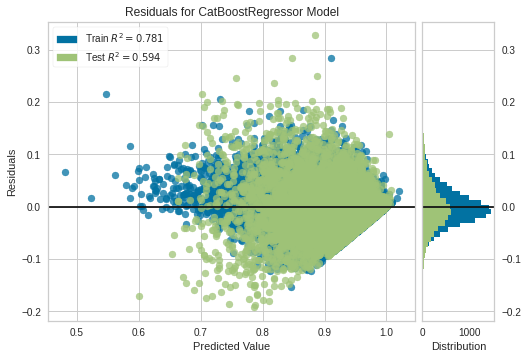

In [ ]:
plot_model(catboost)

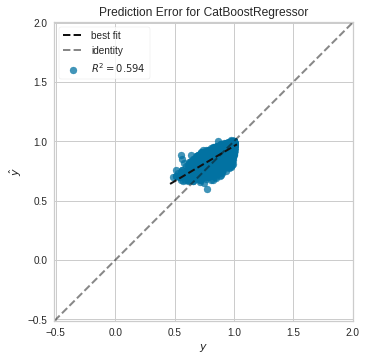

In [ ]:
plot_model(catboost, plot="error")

**Atributos mais importantes**

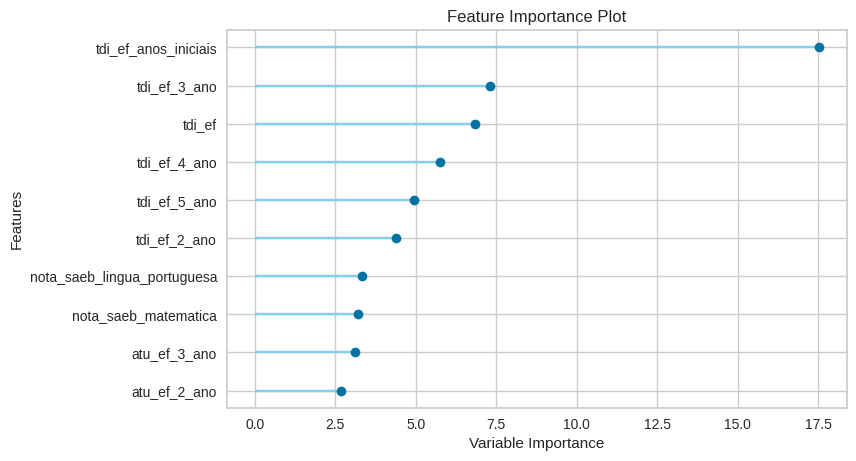

In [ ]:
plot_model(catboost, plot="feature")

**Previsão nos dados de treino**

In [ ]:
predi_modeltreino = predict_model(catboost)
predi_modeltreino

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0378,0.0026,0.0513,0.5938,0.0279,0.0443


,local_func_predio_escolar,quantidade_salas_utilizadas,internet,alimentacao,regular,comum_fund_af,especial_exclusiva_medio_integr,especial_exclusiva_prof,especial_exclusiva_eja_medio,tipo_localizacao_diferenciada,...,eja_1.0,comum_eja_fund_0.0,comum_eja_medio_1.0,fundamental_ciclos_1.0,material_esp_nao_utiliza_1.0,material_esp_quilombola_1.0,material_ped_indigena_1.0,educacao_indigena_1.0,indicador_rendimento,Label
0,1.791385,-0.423943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.06768,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.970233,0.907855
1,-0.281326,0.405104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.06768,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.853960,0.837694
2,-0.281326,-0.755561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.06768,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.938476,0.948996
3,-0.281326,0.073485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.06768,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.963821,0.977366
4,-0.281326,2.063196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.06768,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.902858,0.919271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578,-0.281326,0.405104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.06768,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.856277,0.940264
5579,-0.281326,-0.921370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.06768,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.935699,0.935222
5580,1.791385,-0.755561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.06768,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.940549,0.946829
5581,-0.281326,2.726433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.06768,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.943327,0.914498


**Previsão nos dados de teste**

In [ ]:
predi_model_teste = predict_model(catboost, data=data_test)
predi_model_teste

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0281,0.0014,0.0368,0.7827,0.0198,0.0323


,local_func_predio_escolar,local_func_salas_empresa,local_func_predio_compartilhado,local_func_unid_prisional,local_func_templo_igreja,local_func_casa_professor,local_func_outros,local_func_salas_outra_esc,agua_potavel,agua_rede_publica,...,tdi_ef_3_ano,tdi_ef_4_ano,tdi_ef_5_ano,dsu_ef,dsu_ef_anos_iniciais,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,indicador_rendimento,Label
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,19.4,8.9,18.0,70.6,50.0,172.80,154.32,4.067581,0.881893,0.901009
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,20.8,17.1,8.8,100.0,100.0,199.61,185.22,5.141413,0.919351,0.918501
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,14.3,46.7,50.0,20.0,20.0,132.32,128.44,2.824698,0.600770,0.617526
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,...,32.1,32.6,32.2,46.2,41.7,165.66,155.22,3.947685,0.858567,0.851163
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,23.6,20.5,36.4,27.6,0.0,156.96,139.72,3.500018,0.803635,0.810504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,12.5,18.6,29.2,100.0,100.0,226.36,209.19,6.087545,0.953562,0.937954
5579,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,15.4,21.1,30.3,84.6,66.7,202.74,187.47,5.241864,0.914248,0.908282
5580,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,26.0,12.1,3.3,66.7,66.7,195.05,184.47,5.040563,0.871088,0.930662
5581,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,7.4,10.8,5.3,89.5,85.7,239.27,218.08,6.495365,0.986897,0.966005
